<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics 150 
# Lab #3 - Nuclear Decay - Euler's Method

**Group 4:**
* Kyle Mueller
* Sam Fataua
* Makenzy Pharis

## **Activity 1** - Euler's Equation

Based on the information given in class, fill in the table below by hand.

In [ ]:
from functools import reduce

header = [["Row #", "t(mins)", "N"]]

get_N = lambda n0,λ,dt,mx: reduce(lambda l,_:l+[l[-1]*(1-(λ*dt))],[[n0]]*mx)

make_table = lambda h,n0,λ,dt,rows:h+[*map(list,[*zip([*range(1,rows+1)],[*map(lambda n:(n-1)*dt,range(1,rows+1))],[*map(round,get_N(n0,λ,dt,rows))])])]

table = make_table(header,10000,0.272,0.5,11)

print(*map(lambda r:f"\n{r[0]:^7}{r[1]:^9}{r[2]:^10}",table))


 Row #  t(mins)     N      
   1      0.0     10000    
   2      0.5      8640    
   3      1.0      7465    
   4      1.5      6450    
   5      2.0      5573    
   6      2.5      4815    
   7      3.0      4160    
   8      3.5      3594    
   9      4.0      3105    
  10      4.5      2683    
  11      5.0      2318   


## **Activity 2** - Euler's Method and Plotting in Python - Tutorial

We will work together on this activity.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

λ = 0.272
dt = 0.5

N = np.zeros(61,float)
t = np.arange(0,30.1,0.5)

N[0] = 10000

for i in range(1,61):
  N[i] = N[i-1]*(1-λ*dt)

print(N)

[1.00000000e+04 8.64000000e+03 7.46496000e+03 6.44972544e+03
 5.57256278e+03 4.81469424e+03 4.15989583e+03 3.59414999e+03
 3.10534559e+03 2.68301859e+03 2.31812806e+03 2.00286265e+03
 1.73047333e+03 1.49512896e+03 1.29179142e+03 1.11610778e+03
 9.64317126e+02 8.33169997e+02 7.19858877e+02 6.21958070e+02
 5.37371772e+02 4.64289211e+02 4.01145879e+02 3.46590039e+02
 2.99453794e+02 2.58728078e+02 2.23541059e+02 1.93139475e+02
 1.66872507e+02 1.44177846e+02 1.24569659e+02 1.07628185e+02
 9.29907519e+01 8.03440096e+01 6.94172243e+01 5.99764818e+01
 5.18196803e+01 4.47722038e+01 3.86831841e+01 3.34222710e+01
 2.88768422e+01 2.49495916e+01 2.15564472e+01 1.86247704e+01
 1.60918016e+01 1.39033166e+01 1.20124655e+01 1.03787702e+01
 8.96725746e+00 7.74771044e+00 6.69402182e+00 5.78363486e+00
 4.99706052e+00 4.31746029e+00 3.73028569e+00 3.22296683e+00
 2.78464334e+00 2.40593185e+00 2.07872512e+00 1.79601850e+00
 1.55175999e+00]


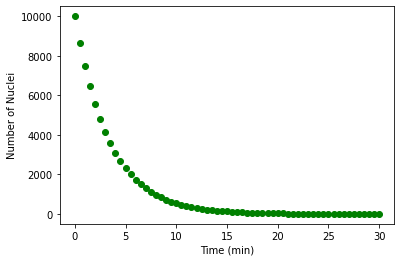

In [ ]:
plt.plot(t,N,'go')
plt.xlabel("Time (min)")
plt.ylabel("Number of Nuclei")
plt.show()

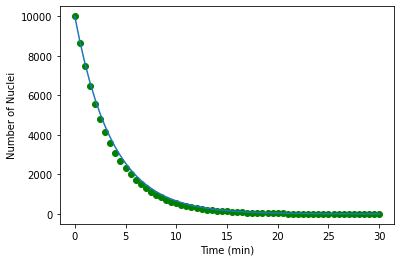

In [ ]:
plt.plot(t,N,'go')

N_e = 10000*np.exp(-λ*t)
plt.plot(t,N_e)

plt.xlabel("Time (min)")
plt.ylabel("Number of Nuclei")
plt.show()

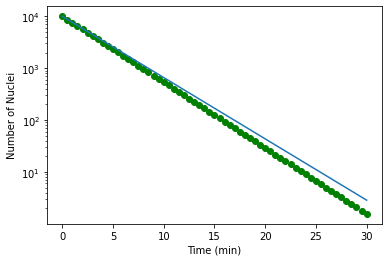

In [ ]:
plt.semilogy(t, N, 'go')
plt.semilogy(t, N_e)
plt.xlabel("Time (min)")
plt.ylabel("Number of Nuclei")
plt.show()

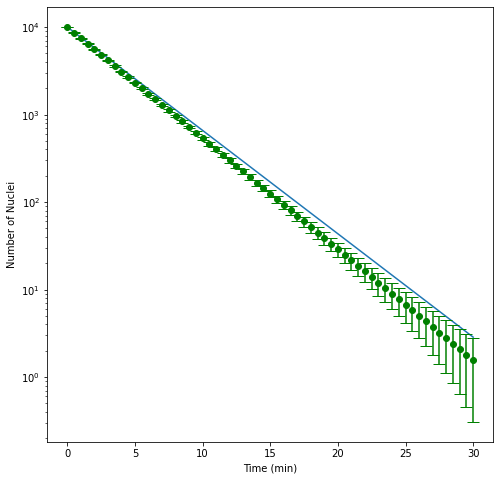

In [ ]:
plt.figure(figsize=(8,8))

plt.semilogy(t, N_e)
plt.errorbar(t, N, yerr=np.sqrt(N), fmt='go', capsize=6)
plt.xlabel("Time (min)")
plt.ylabel("Number of Nuclei")
plt.show()

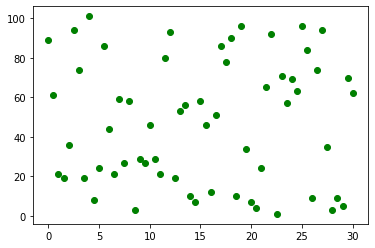

In [ ]:
from random import randint
N_exp = np.array([*map(lambda _:randint(1,101),range(1,62))])
plt.plot(t,N_exp,'go')
plt.show()

<ErrorbarContainer object of 3 artists>

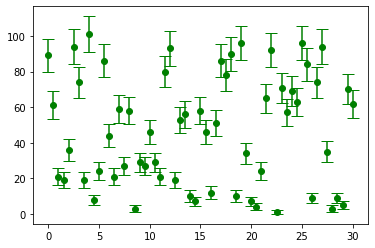

In [ ]:
plt.errorbar(t, N_exp, yerr=np.sqrt(N_exp), fmt='go', capsize=6)

## **Activity 3** - Understanding Background

In any counting experiment, the uncertainty in the measurement is equal to the square root of the number counted. In this activity, we will investigate the effects of this observation.

In Logger Pro go to Experiment > Data Collection and use the following:
* Duration: 100 seconds
* Sampling Rate: 10 seconds / sample

Using your 10 data points for each radioactive object, complete the following table:

In [ ]:
from statistics import stdev

avg = lambda l:sum(l)/len(l)
sqrtavg = lambda l:avg(l)**0.5
make_row = lambda t,d:[t,avg(d),f"{stdev(d):0.2f}",f"{sqrtavg(d):0.2f}"]

headers = ["Sample", "Average", "Stdev", "Sqrt"]

background_data = [8,4,5,2,3,4,4,1,1,7]
background = make_row("Background",background_data)

compass_data = [790,891,841,776,837,848,843,840,793,904]
compass = make_row("Compass",compass_data)

watch_data = [26,19,21,22,19,26,19,17,24,27]
watch = make_row("Watch",watch_data)

rock_data = [401,404,385,413,397,394,397,388,442,369]
rock = make_row("Rock w/ Uranium",rock_data)

emitter_data = [302,291,305,281,283,280,281,293,318,267]
emitter = make_row("Cs/Ba Emitter",emitter_data)

clock_data = [12,7,10,7,8,7,9,9,11,16]
clock = make_row("Clock",clock_data)

table = [headers,background,compass,watch,rock,emitter,clock]

print(*map(lambda r:f"\n{r[0]:<15}{r[1]:>10}{r[2]:>10}{r[3]:>10}",table))


Sample            Average     Stdev      Sqrt 
Background            3.9      2.33      1.97 
Compass             836.3     41.43     28.92 
Watch                22.0      3.56      4.69 
Rock w/ Uranium     399.0     19.22     19.97 
Cs/Ba Emitter       290.1     14.92     17.03 
Clock                 9.6      2.84      3.10


The important thing to note is that there is a variation in the background that scales with the level of the background. Therefore, it isn't a simple thing to remove the background.

## **Activity 4** - Real Data

Collect the data from the radioactive Ba-137. Use the following settings in Logger Pro:
* Duration: 30 minutes
* Sampling Rate: 0.5 minutes / sample

It is important to start collecting data right after the sample is placed on the tray since the sample has a short half-life.

Make a semi-log plot of your collected data vs. time. Show error bars and use discrete points. Also make a plot of the exact curve and include background:

$$N(t)=N_o{}e^{-\lambda{}t}+B$$

You will need to use the $N_o$ from the collected data and the average background value, B, from Activity 3. Show these two plots on the same graph.

$$N(0.5) = 5731$$

$$N(0) = \frac{N(0.5)}{1-\lambda{}*0.5} = 6633$$

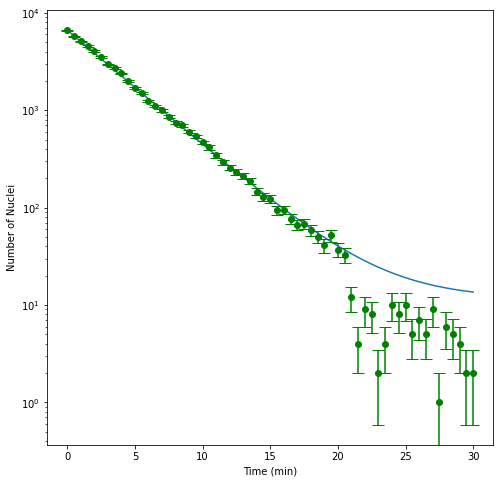

In [ ]:
t = np.arange(0,30.1,0.5)
data = [6633,5731,5124,4556,4050,3523,2953,2705,2387,2014,1709,1515,1251,1102,1001,855,743,700,602,539,467,415,343,291,258,232,210,188,146,129,124,94,95,77,67,68,59,50,41,52,37,33,12,4,9,8,2,4,10,8,10,5,7,5,9,1,6,5,4,2,2]

B = background[1]*3

N_o = 6633*np.exp(-λ*t) + B

plt.figure(figsize=(8,8))

plt.semilogy(t, N_o)
plt.errorbar(t, data, yerr=np.sqrt(data), fmt='go', capsize=6)
plt.xlabel("Time (min)")
plt.ylabel("Number of Nuclei")
plt.show()

Explanation for the slightly strange data: Our equipment had a malfunction at around 20 minutes, and there was a short period of time (about 30 seconds) where the equipment was not collecting data and had to be restarted to collect more data.